### Embd-learning-vis
Generate a gif to see how a pytorch Embedding layer learns semantic similarity between input tokens.

In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import torch
import torch.optim as optim
from torch import nn

import imageio
from IPython.display import HTML

#### Dataset
Since we just care about visualizing the learning progress of a single embedding layer our underlying dataset doesn't need semantic meaning we can make sense of. Therefore our dataset will just be 3 classes of 200 data points.

In [2]:
dataset = np.array(range(0,3*200))
X1, X2, X3 = np.array_split(dataset, 3)
labels = [X3.max() + i for i in range(1, 4)]
print(f"labels: {labels}\n")
print(f"classes:\nX1: {X1}\n\nX2:{X2}\n\nX3:{X3}")

labels: [600, 601, 602]

classes:
X1: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199]

X2:[200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235

In [3]:
label_assignments = np.concatenate(([np.full(200, i) for i in range(3)]))
label_assignments

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

### Embedding Cluster
A simple single embedding layer model projecting the 1D input space to a 3D space.

In [4]:
class EmbedCluster(nn.Module):
    def __init__(self, vocab_size, d_embed, n_labels):
        super().__init__()
        self.embed = nn.Embedding(vocab_size, d_embed)
        self.linear = nn.Linear(d_embed, n_labels, bias=False)

    def forward(self, x):
        return self.linear(self.embed(x) )

In [5]:
vocab_size = len(dataset) + len(labels)
model = EmbedCluster(vocab_size, 3, len(labels))
embedding_layer = model.embed

### Baseline Clustering

In [6]:
def plot_embeddings(embeddings, labels):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Create a color map for the labels
    cmap = plt.get_cmap('rainbow')
    colors = cmap(labels) / float(max(labels))
    vals = np.array([embd.detach().numpy() for embd in embeddings])
    
    ax.scatter(vals[:, 0], vals[:, 1], vals[:, 2], c=labels)
    return fig

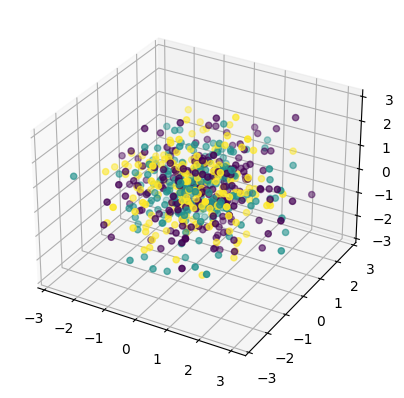

In [14]:
X = [embedding_layer(torch.tensor([token]))[0] for token in dataset]
plot_embeddings(X, label_assignments)
plt.show()

### Training Loop

In [15]:
source = torch.LongTensor(dataset)
target = torch.LongTensor(label_assignments)

In [16]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=2)
epochs = 3000
n_save = 10
losses = []

In [17]:
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(source)    
    loss = loss_function(outputs, target)
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    
    if epoch % n_save == 0:
        X = embedding_layer(source)
        fig = plot_embeddings(X, label_assignments)
        plt.savefig(f'epoch_{epoch}.png')
        plt.close(fig)
    
    if epoch % 100 == 99:
        print(f"Epoch {epoch+1}/{epochs} Loss: {loss.item()}")

Epoch 100/3000 Loss: 1.0864945650100708
Epoch 200/3000 Loss: 1.0745161771774292
Epoch 300/3000 Loss: 1.0501418113708496
Epoch 400/3000 Loss: 0.9991713166236877
Epoch 500/3000 Loss: 0.8864633440971375
Epoch 600/3000 Loss: 0.6051992774009705
Epoch 700/3000 Loss: 0.0781107023358345
Epoch 800/3000 Loss: 0.011608832515776157
Epoch 900/3000 Loss: 0.005400580819696188
Epoch 1000/3000 Loss: 0.003386958735063672
Epoch 1100/3000 Loss: 0.002424265258014202
Epoch 1200/3000 Loss: 0.0018690844299271703
Epoch 1300/3000 Loss: 0.0015112090623006225
Epoch 1400/3000 Loss: 0.0012628331314772367
Epoch 1500/3000 Loss: 0.0010811411775648594
Epoch 1600/3000 Loss: 0.0009428816265426576
Epoch 1700/3000 Loss: 0.0008344058296643198
Epoch 1800/3000 Loss: 0.000747185607906431
Epoch 1900/3000 Loss: 0.0006756350048817694
Epoch 2000/3000 Loss: 0.0006159572512842715
Epoch 2100/3000 Loss: 0.00056548131396994
Epoch 2200/3000 Loss: 0.0005222614854574203
Epoch 2300/3000 Loss: 0.00048486649757251143
Epoch 2400/3000 Loss: 0.

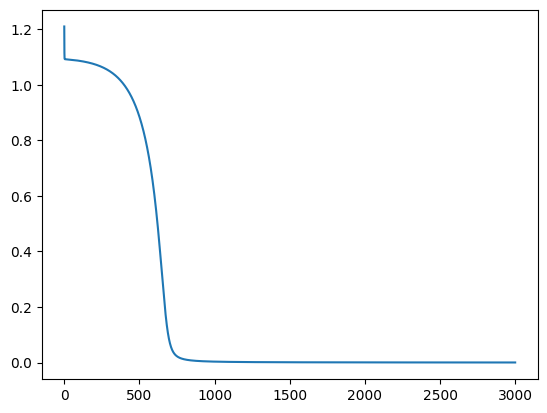

In [18]:
plt.plot(losses)

In [19]:
filename = "training_animation.gif"

In [20]:
image_files = [f'epoch_{i}.png' for i in range(0, epochs, n_save)]
images = [imageio.v2.imread(file) for file in image_files]
imageio.mimsave(filename, images, duration=20)
for file in image_files:
    os.remove(file)

In [21]:
HTML(f'<img src="./{filename}">')